In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import string
%matplotlib inline

In [3]:
#Loading the dataset
df = pd.read_csv('/Users/nikkullu/Downloads/Final04202023_V2.csv')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3,4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,url,title,score,comms_num,created,body,author,...,sentimentTextBlob,polarityTextBlob,sentimentAFINN,polarityAFINN,sentimentVader,polarityVader,weightedScore,weightedpolarityTextBlob,weightedpolarityAFINN,weightedpolarityVader
0,0,0,lu7npx,https://www.reddit.com/r/CryptoCurrency/commen...,Delete your widgets,1,0.0,28-02-2021,[removed],NaN,...,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003609,0.000000,0.000000,0.000000
1,1,1,lu7nfe,https://www.reddit.com/r/CryptoCurrency/commen...,Thank You! For all the laughs!,9,10.0,28-02-2021,With the difficult few days many of us have ex...,NaN,...,Positive,0.2919,Positive,18,Positive,0.9798,0.004034,0.001178,0.072611,0.003952
2,2,2,gp4nbyx,NaN,Comment,5,0.0,28-02-2021,I'm only laughing on the outside.,NaN,...,Neutral,0.0000,Positive,1,Positive,0.4939,0.003822,0.000000,0.003822,0.001888
3,3,3,gp4n1q3,NaN,Comment,4,0.0,28-02-2021,"Whatever happens, just keep smiling\n\n![gif](...",NaN,...,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003769,0.000000,0.000000,0.000000
4,4,4,gp4plw7,NaN,Comment,2,0.0,28-02-2021,How the shit do you post a gif comment in some...,NaN,...,Negative,-0.2000,Negative,-4,Negative,-0.5574,0.003662,-0.000732,-0.014650,-0.002041


In [6]:
#removing first two columns
df = df.iloc[: , 2:]

In [7]:
df.head()

,title,score,comms_num,created,body,author,combinedText,sentimentTextBlob,polarityTextBlob,sentimentAFINN,polarityAFINN,sentimentVader,polarityVader,weightedScore,weightedpolarityTextBlob,weightedpolarityAFINN,weightedpolarityVader
0,Delete your widgets,1,0.0,28-02-2021,[removed],NaN,delete widget,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003609,0.000000,0.000000,0.000000
1,Thank You! For all the laughs!,9,10.0,28-02-2021,With the difficult few days many of us have ex...,NaN,thank laugh difficult day many u experienced v...,Positive,0.2919,Positive,18,Positive,0.9798,0.004034,0.001178,0.072611,0.003952
2,Comment,5,0.0,28-02-2021,I'm only laughing on the outside.,NaN,im laughing outside,Neutral,0.0000,Positive,1,Positive,0.4939,0.003822,0.000000,0.003822,0.001888
3,Comment,4,0.0,28-02-2021,"Whatever happens, just keep smiling\n\n![gif](...",NaN,whatever happens keep smilinggifgiphyqfdbjmrzd...,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003769,0.000000,0.000000,0.000000
4,Comment,2,0.0,28-02-2021,How the shit do you post a gif comment in some...,NaN,shit post gif sub,Negative,-0.2000,Negative,-4,Negative,-0.5574,0.003662,-0.000732,-0.014650,-0.002041


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237150 entries, 0 to 237149
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   title                     37152 non-null   object 
 1   score                     237150 non-null  int64  
 2   comms_num                 37152 non-null   float64
 3   created                   237150 non-null  object 
 4   body                      233513 non-null  object 
 5   author                    199996 non-null  object 
 6   combinedText              202805 non-null  object 
 7   sentimentTextBlob         237150 non-null  object 
 8   polarityTextBlob          237150 non-null  float64
 9   sentimentAFINN            237150 non-null  object 
 10  polarityAFINN             237150 non-null  int64  
 11  sentimentVader            237150 non-null  object 
 12  polarityVader             237150 non-null  float64
 13  weightedScore             237150 non-null  f

In [69]:
df['title'] = df['title'].fillna('-')
df['combinedText'] = df['combinedText'].fillna('-')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237150 entries, 0 to 237149
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   title                     237150 non-null  object        
 1   score                     237150 non-null  int64         
 2   comms_num                 37152 non-null   float64       
 3   created                   237150 non-null  datetime64[ns]
 4   body                      233513 non-null  object        
 5   author                    199996 non-null  object        
 6   combinedText              237150 non-null  object        
 7   sentimentTextBlob         237150 non-null  object        
 8   polarityTextBlob          237150 non-null  float64       
 9   sentimentAFINN            237150 non-null  object        
 10  polarityAFINN             237150 non-null  int64         
 11  sentimentVader            237150 non-null  object        
 12  po

In [70]:
df['titleLength'] = df['title'].apply(len)
df['combinedTextLength'] = df['combinedText'].apply(len)

In [71]:
df.head()

,title,score,comms_num,created,body,author,combinedText,sentimentTextBlob,polarityTextBlob,sentimentAFINN,polarityAFINN,sentimentVader,polarityVader,weightedScore,weightedpolarityTextBlob,weightedpolarityAFINN,weightedpolarityVader,titleLength,combinedTextLength,Date1
0,Delete your widgets,1,0.0,2021-02-28,[removed],NaN,delete widget,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003609,0.000000,0.000000,0.000000,19,13,2021-02-28
1,Thank You! For all the laughs!,9,10.0,2021-02-28,With the difficult few days many of us have ex...,NaN,thank laugh difficult day many u experienced v...,Positive,0.2919,Positive,18,Positive,0.9798,0.004034,0.001178,0.072611,0.003952,30,221,2021-02-28
2,Comment,5,0.0,2021-02-28,I'm only laughing on the outside.,NaN,im laughing outside,Neutral,0.0000,Positive,1,Positive,0.4939,0.003822,0.000000,0.003822,0.001888,7,19,2021-02-28
3,Comment,4,0.0,2021-02-28,"Whatever happens, just keep smiling\n\n![gif](...",NaN,whatever happens keep smilinggifgiphyqfdbjmrzd...,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003769,0.000000,0.000000,0.000000,7,61,2021-02-28
4,Comment,2,0.0,2021-02-28,How the shit do you post a gif comment in some...,NaN,shit post gif sub,Negative,-0.2000,Negative,-4,Negative,-0.5574,0.003662,-0.000732,-0.014650,-0.002041,7,17,2021-02-28


In [17]:
df['titleLength'].max()

300

In [18]:
df['combinedTextLength'].max()

16657

In [19]:
df1 = df.loc[df["titleLength"] >100 , "titleLength"]


<AxesSubplot:ylabel='Frequency'>

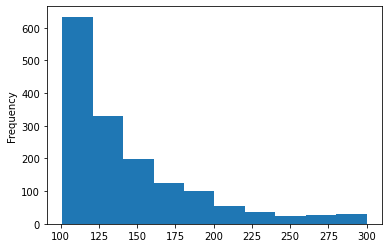

In [22]:
#The histogram showing the comparison of no of different lengths of the title column. 
df1.plot.hist()

In [21]:
stopwordsSet = set(STOPWORDS)

In [24]:
#Function for text cleaning to be used in wordcloud
def textCleaning(words):
    x = words.str.translate(str.maketrans('', '', string.punctuation))
    x = ''.join(x)
    return x


(-0.5, 399.5, 199.5, -0.5)

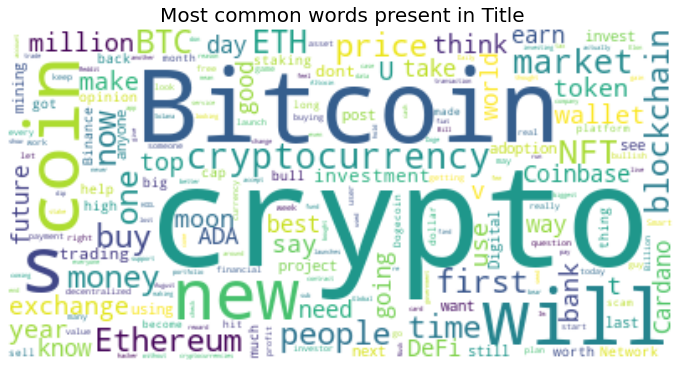

In [25]:
#The word cloud exhibiting the recurrent words present in the title column 
titleWC = WordCloud(stopwords = stopwordsSet, background_color='white', collocations = False).generate(textCleaning(df['title']))
plt.figure(figsize=(12,10))
plt.imshow(titleWC, interpolation='bilinear')
plt.title('Most common words present in Title', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

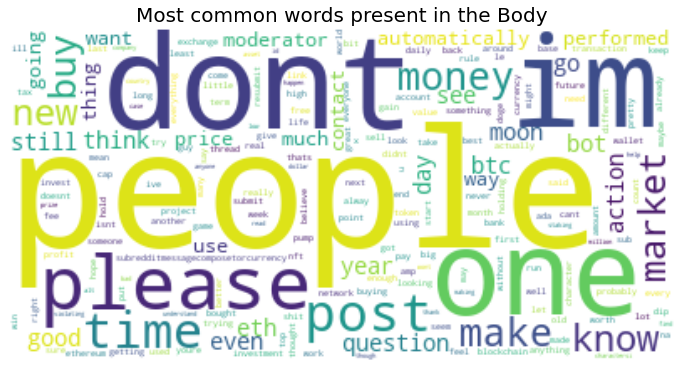

In [26]:
#The word cloud exhibiting the recurrent words present in the body column 
bodyWC = WordCloud(stopwords = stopwordsSet, background_color='white', collocations = False).generate(textCleaning(df['combinedText']))
plt.figure(figsize=(12,10))
plt.imshow(bodyWC, interpolation='bilinear')
plt.title('Most common words present in the Body', fontsize = 20)
plt.axis('off')

In [28]:
df2 = df['sentimentTextBlob'].value_counts()
df2.head()


Neutral     112555
Positive     89141
Negative     35454
Name: sentimentTextBlob, dtype: int64

<AxesSubplot:>

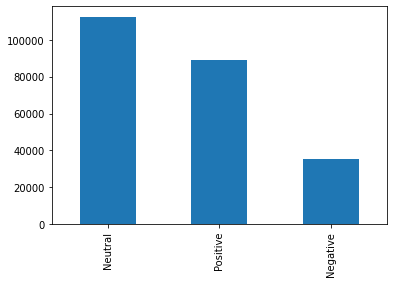

In [29]:
#Bar chart with the count of Positive, Negative and Neutral Sentiments using TextBlob 
df2.plot.bar()

In [30]:
df3 = df['sentimentAFINN'].value_counts()
df3

Neutral     112654
Positive     84874
Negative     39622
Name: sentimentAFINN, dtype: int64

<AxesSubplot:>

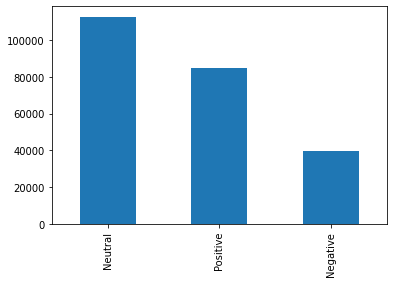

In [31]:
#Bar chart with the count of Positive, Negative and Neutral Sentiments using AFINN
df3.plot.bar()

In [32]:
df4 = df['sentimentVader'].value_counts()
df4

Positive    99745
Neutral     97497
Negative    39908
Name: sentimentVader, dtype: int64

<AxesSubplot:>

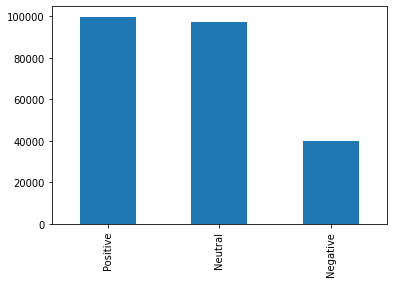

In [33]:
#Bar chart with the count of Positive, Negative and Neutral Sentiments using Vader 
df4.plot.bar()

In [34]:
posList = []
for i in range(0, len(df)):
    if df['sentimentTextBlob'][i] == 'positive':
        posList.append(df['title'][i])

In [35]:
df5 = df.loc[(df["sentimentTextBlob"] == "Positive"), ["title"]]

(-0.5, 399.5, 199.5, -0.5)

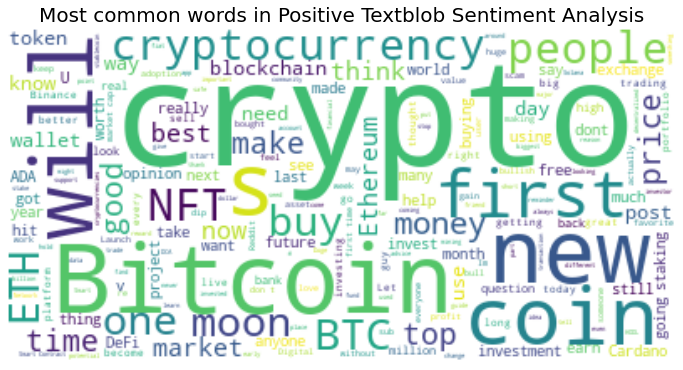

In [36]:
posWC = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(df5['title']))
plt.figure(figsize=(12,10))
plt.imshow(posWC, interpolation='bilinear')
plt.title('Most common words in Positive Textblob Sentiment Analysis', fontsize = 20)
plt.axis('off')

In [37]:
df6 = df.loc[(df["sentimentTextBlob"] == "Negative"), ["title"]]

(-0.5, 399.5, 199.5, -0.5)

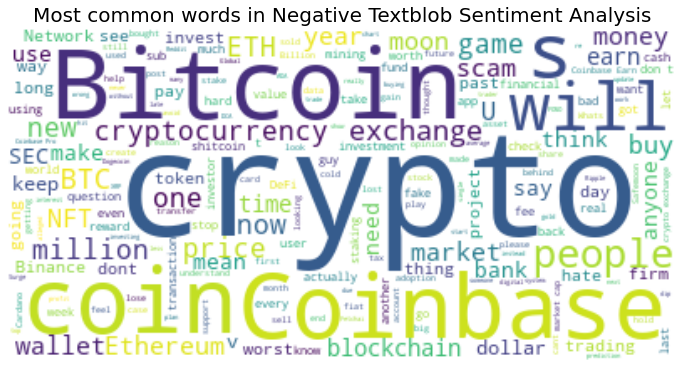

In [38]:
posNG = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(df6['title']))
plt.figure(figsize=(12,10))
plt.imshow(posNG, interpolation='bilinear')
plt.title('Most common words in Negative Textblob Sentiment Analysis', fontsize = 20)
plt.axis('off')

In [39]:
df7 = df.loc[(df["sentimentTextBlob"] == "Negative"), ["title"]]

(-0.5, 399.5, 199.5, -0.5)

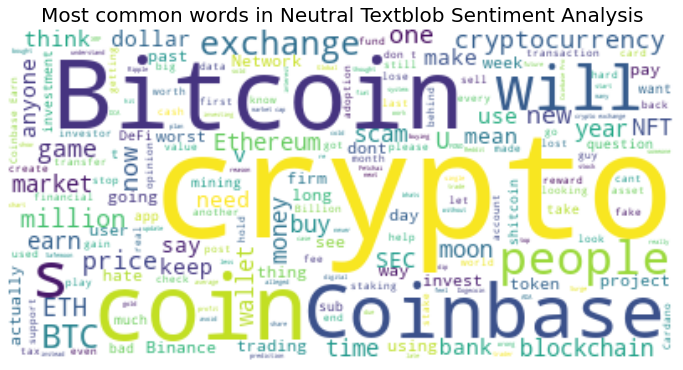

In [40]:
posNU = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(df7['title']))
plt.figure(figsize=(12,10))
plt.imshow(posNU, interpolation='bilinear')
plt.title('Most common words in Neutral Textblob Sentiment Analysis', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

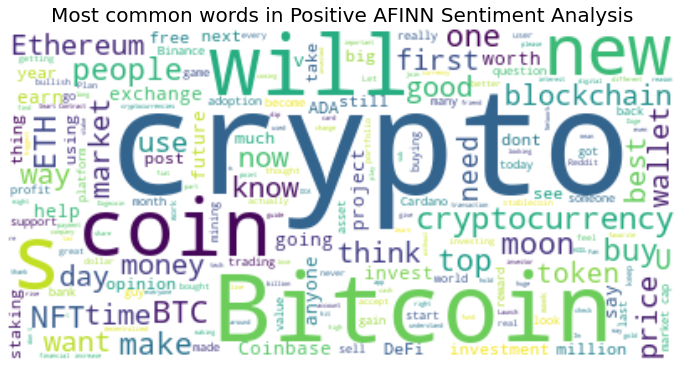

In [41]:
p = df.loc[(df["sentimentAFINN"] == "Positive"), ["title"]]
posP = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(p['title']))
plt.figure(figsize=(12,10))
plt.imshow(posP, interpolation='bilinear')
plt.title('Most common words in Positive AFINN Sentiment Analysis', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

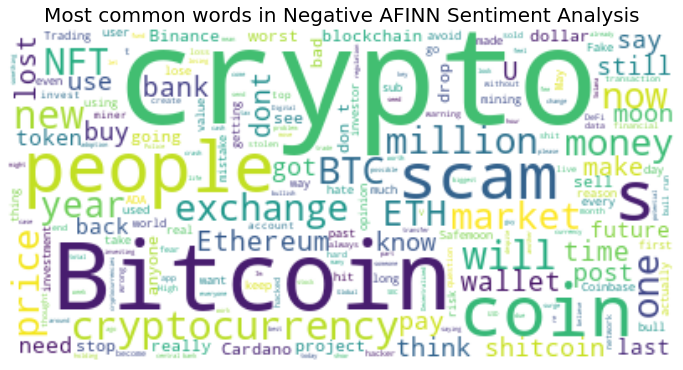

In [42]:
p = df.loc[(df["sentimentAFINN"] == "Negative"), ["title"]]
posN = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(p['title']))
plt.figure(figsize=(12,10))
plt.imshow(posN, interpolation='bilinear')
plt.title('Most common words in Negative AFINN Sentiment Analysis', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

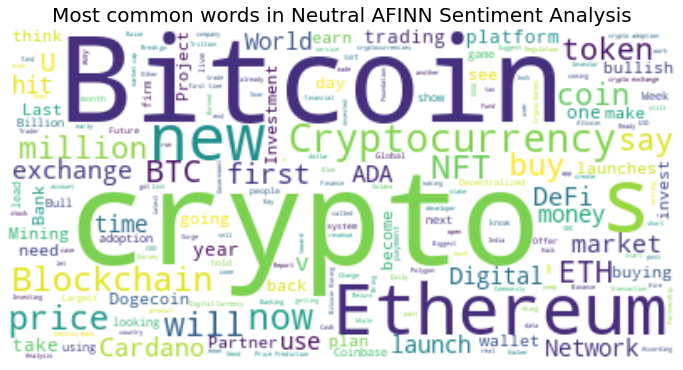

In [43]:
p = df.loc[(df["sentimentAFINN"] == "Neutral"), ["title"]]
posNT = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(p['title']))
plt.figure(figsize=(12,10))
plt.imshow(posNT, interpolation='bilinear')
plt.title('Most common words in Neutral AFINN Sentiment Analysis', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

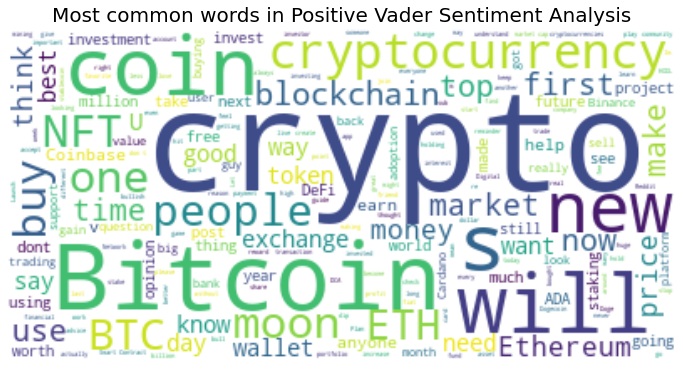

In [44]:
p = df.loc[(df["sentimentVader"] == "Positive"), ["title"]]
posPV = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(p['title']))
plt.figure(figsize=(12,10))
plt.imshow(posPV, interpolation='bilinear')
plt.title('Most common words in Positive Vader Sentiment Analysis', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

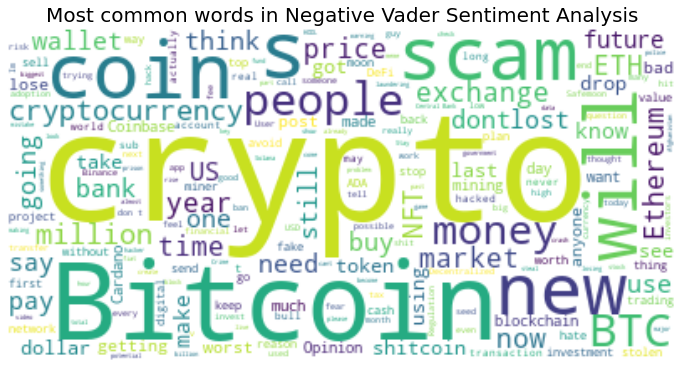

In [45]:
p = df.loc[(df["sentimentVader"] == "Negative"), ["title"]]
posNV = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(p['title']))
plt.figure(figsize=(12,10))
plt.imshow(posNV, interpolation='bilinear')
plt.title('Most common words in Negative Vader Sentiment Analysis', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

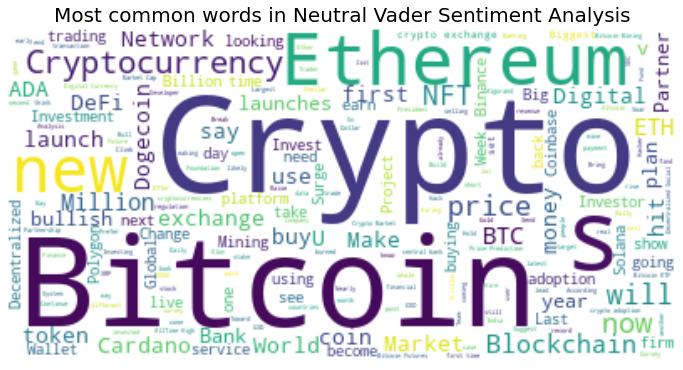

In [46]:
p = df.loc[(df["sentimentVader"] == "Neutral"), ["title"]]
posNTV = WordCloud(stopwords = stopwordsSet, background_color='white').generate(textCleaning(p['title']))
plt.figure(figsize=(12,10))
plt.imshow(posNTV, interpolation='bilinear')
plt.title('Most common words in Neutral Vader Sentiment Analysis', fontsize = 20)
plt.axis('off')

In [47]:
#Changing the datatype of created column.
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
df['Date1'] = df['created'].dt.date
df.head()

,title,score,comms_num,created,body,author,combinedText,sentimentTextBlob,polarityTextBlob,sentimentAFINN,polarityAFINN,sentimentVader,polarityVader,weightedScore,weightedpolarityTextBlob,weightedpolarityAFINN,weightedpolarityVader,titleLength,combinedTextLength,Date1
0,Delete your widgets,1,0.0,2021-02-28,[removed],NaN,delete widget,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003609,0.000000,0.000000,0.000000,19,13,2021-02-28
1,Thank You! For all the laughs!,9,10.0,2021-02-28,With the difficult few days many of us have ex...,NaN,thank laugh difficult day many u experienced v...,Positive,0.2919,Positive,18,Positive,0.9798,0.004034,0.001178,0.072611,0.003952,30,221,2021-02-28
2,Comment,5,0.0,2021-02-28,I'm only laughing on the outside.,NaN,im laughing outside,Neutral,0.0000,Positive,1,Positive,0.4939,0.003822,0.000000,0.003822,0.001888,7,19,2021-02-28
3,Comment,4,0.0,2021-02-28,"Whatever happens, just keep smiling\n\n![gif](...",NaN,whatever happens keep smilinggifgiphyqfdbjmrzd...,Neutral,0.0000,Neutral,0,Neutral,0.0000,0.003769,0.000000,0.000000,0.000000,7,61,2021-02-28
4,Comment,2,0.0,2021-02-28,How the shit do you post a gif comment in some...,NaN,shit post gif sub,Negative,-0.2000,Negative,-4,Negative,-0.5574,0.003662,-0.000732,-0.014650,-0.002041,7,17,2021-02-28


In [48]:
#Loading bitcoin price dataset
df_price = pd.read_csv('/Users/nikkullu/Desktop/DA/Predictive Analytics/BitcoinPrices.csv')

In [49]:
#Chaning the datatype of date column in bitcoin price dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price['Date1'] = df_price['Date'].dt.date
df_price.head()

,Date,Price,Open,High,Low,Vol.,Change %,Date1
0,2022-04-20,"41,309.0","41,499.0","41,550.0","41,235.0",254.28M,-0.47%,2022-04-20
1,2022-04-19,"41,503.0","40,809.0","41,746.0","40,585.0",268.28M,1.72%,2022-04-19
2,2022-04-18,"40,803.0","39,700.0","41,095.0","38,577.0",484.26M,2.77%,2022-04-18
3,2022-04-17,"39,703.0","40,382.0","40,599.0","39,561.0",210.01M,-1.68%,2022-04-17
4,2022-04-16,"40,382.0","40,571.0","40,691.0","40,003.0",151.31M,-0.44%,2022-04-16


In [50]:
#Joining the two datasets
df8 = pd.merge(df, df_price, on='Date1')


In [51]:
df8.head()

,title,score,comms_num,created,body,author,combinedText,sentimentTextBlob,polarityTextBlob,sentimentAFINN,...,titleLength,combinedTextLength,Date1,Date,Price,Open,High,Low,Vol.,Change %
0,Delete your widgets,1,0.0,2021-02-28,[removed],NaN,delete widget,Neutral,0.0000,Neutral,...,19,13,2021-02-28,2021-02-28,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%
1,Thank You! For all the laughs!,9,10.0,2021-02-28,With the difficult few days many of us have ex...,NaN,thank laugh difficult day many u experienced v...,Positive,0.2919,Positive,...,30,221,2021-02-28,2021-02-28,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%
2,Comment,5,0.0,2021-02-28,I'm only laughing on the outside.,NaN,im laughing outside,Neutral,0.0000,Positive,...,7,19,2021-02-28,2021-02-28,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%
3,Comment,4,0.0,2021-02-28,"Whatever happens, just keep smiling\n\n![gif](...",NaN,whatever happens keep smilinggifgiphyqfdbjmrzd...,Neutral,0.0000,Neutral,...,7,61,2021-02-28,2021-02-28,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%
4,Comment,2,0.0,2021-02-28,How the shit do you post a gif comment in some...,NaN,shit post gif sub,Negative,-0.2000,Negative,...,7,17,2021-02-28,2021-02-28,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%


In [52]:
#Changing the datatype of price column to integer
df8["Price"] = df8["Price"].replace('\D', '', regex=True).astype(int)

Text(0.5, 1.0, 'Correlation')

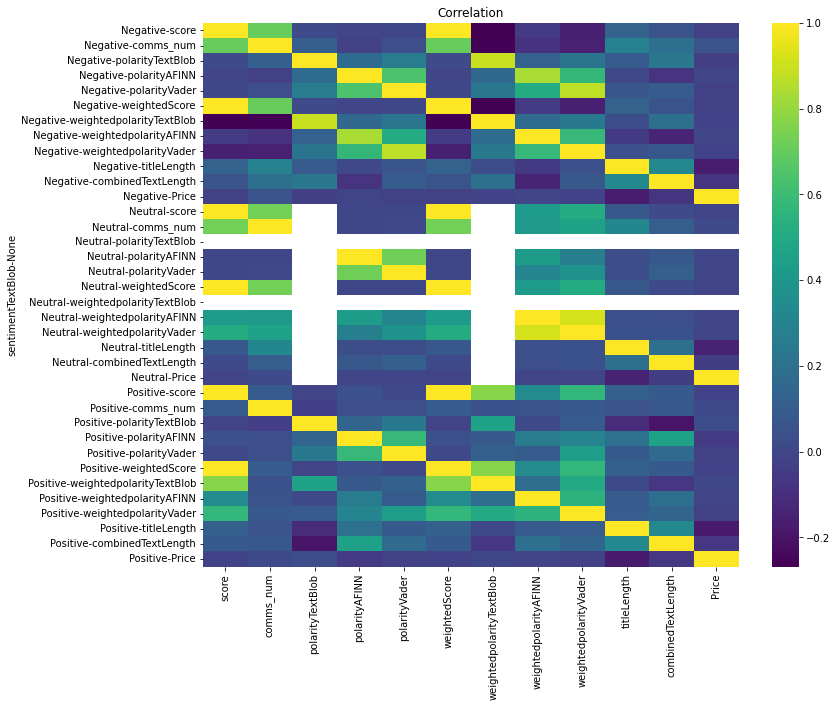

In [53]:
#Heat Map for the dataset
plt.figure(figsize=(12,10))
sns.heatmap(df8.groupby('sentimentTextBlob').corr(), cmap = 'viridis')
plt.title("Correlation")

In [54]:
df9 = pd.crosstab(df8.Date1,df8.sentimentTextBlob)


In [55]:
df9.head()

sentimentTextBlob,Negative,Neutral,Positive
Date1,,,
2021-02-27,35,82,130
2021-02-28,133,290,295
2021-03-01,4,7,13
2021-03-02,2,1,2
2021-03-04,0,0,1


<AxesSubplot:xlabel='Date1'>

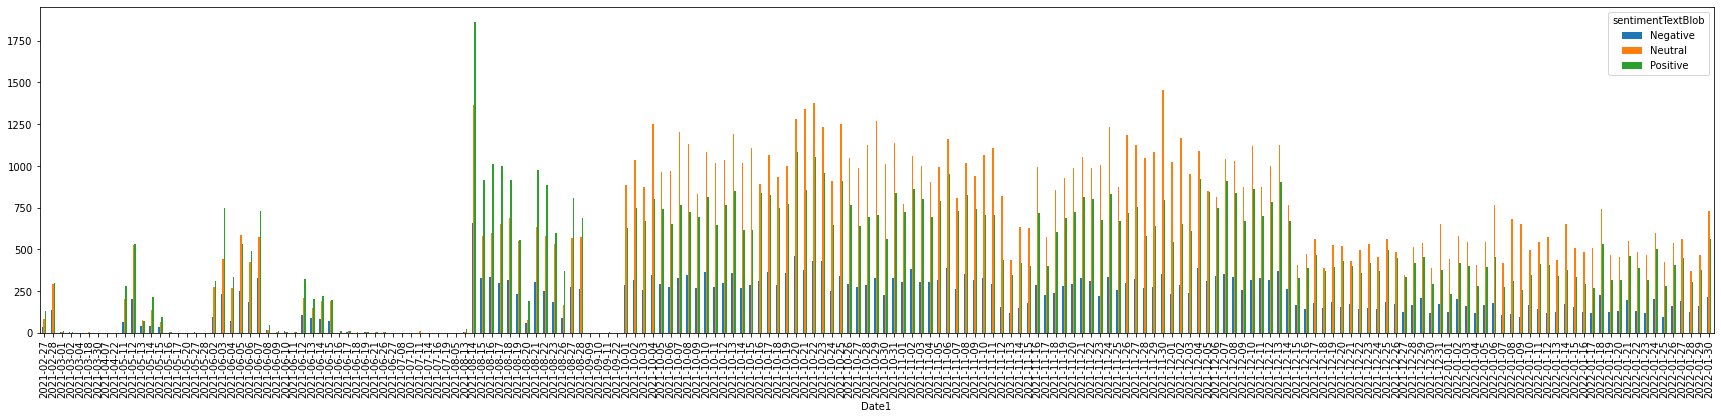

In [56]:
#The chart showing the count of positive, negative and neutral sentiments across the whole dataset
df9.plot.bar(figsize=(30,6))

In [57]:
#The number of posts per day in the month of January 2022
df10 = df8.loc[(df8["Date"] > "2022-01-01") & (df8["Date"] < "2022-01-31"), ["Date","sentimentTextBlob"]]
df10

df21 = df10['Date'].value_counts()

<AxesSubplot:>

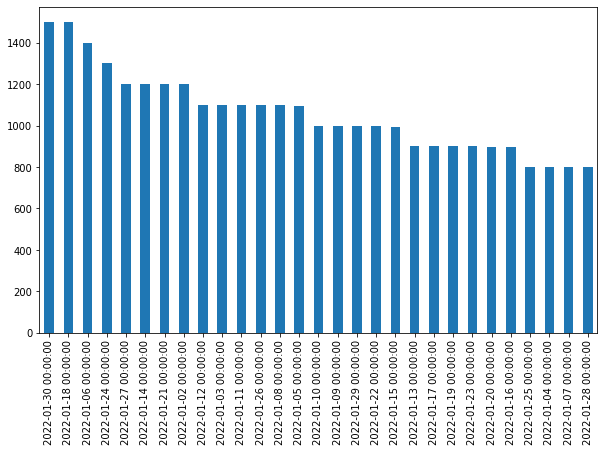

In [58]:
df21.plot.bar(figsize=(10,6))

<AxesSubplot:>

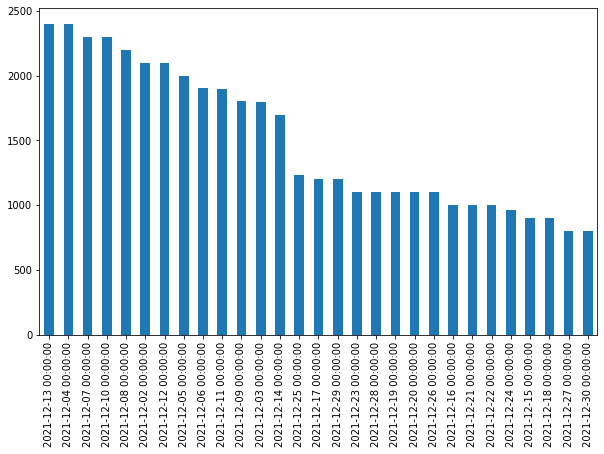

In [66]:
#The number of posts per day in the month of December 2021
df10 = df8.loc[(df8["Date"] > "2021-12-01") & (df8["Date"] < "2021-12-31"), ["Date","sentimentTextBlob"]]
df10

df21 = df10['Date'].value_counts()
df21.plot.bar(figsize=(10,6))

<AxesSubplot:>

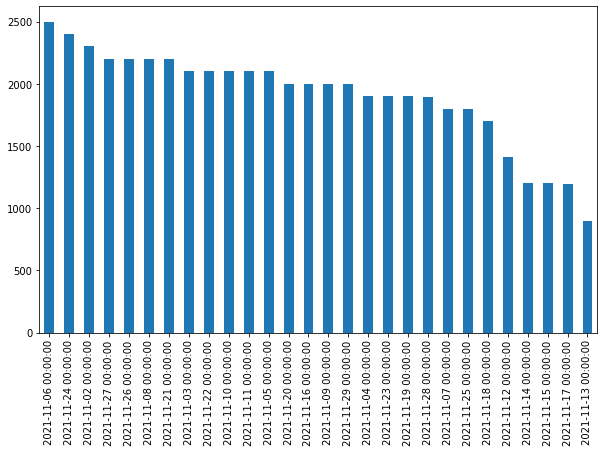

In [67]:
#The number of posts per day in the month of November 2021
df10 = df8.loc[(df8["Date"] > "2021-11-01") & (df8["Date"] < "2021-11-30"), ["Date","sentimentTextBlob"]]
df10

df21 = df10['Date'].value_counts()
df21.plot.bar(figsize=(10,6))

<AxesSubplot:>

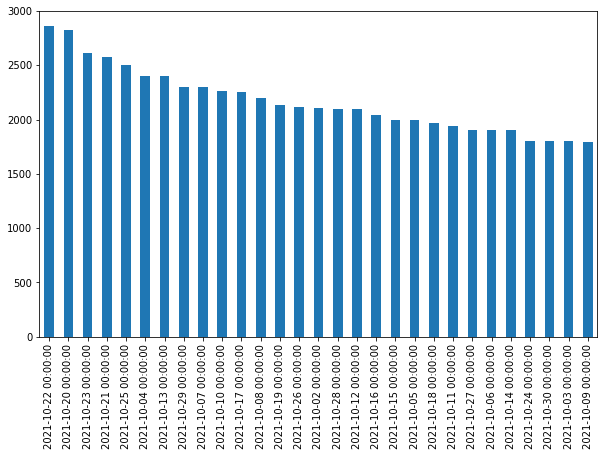

In [68]:
#The number of posts per day in the month of October 2021
df10 = df8.loc[(df8["Date"] > "2021-10-01") & (df8["Date"] < "2021-10-31"), ["Date","sentimentTextBlob"]]
df10

df21 = df10['Date'].value_counts()
df21.plot.bar(figsize=(10,6))

In [59]:
df11 = df8.loc[(df8["Date"] > "2021-08-01") & (df8["Date"] < "2021-09-01"), ["Date","sentimentTextBlob"]]
df11.head()

,Date,sentimentTextBlob
998,2021-08-18,Positive
999,2021-08-18,Negative
1000,2021-08-18,Neutral
1001,2021-08-18,Positive
1002,2021-08-18,Positive


In [60]:
df12 = pd.crosstab(df11.Date,df11.sentimentTextBlob)


<AxesSubplot:xlabel='Date'>

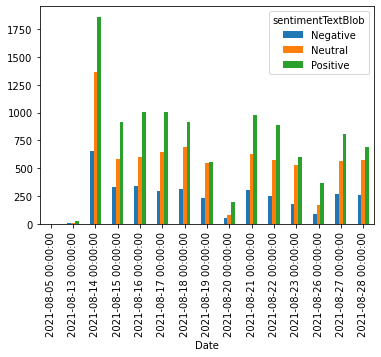

In [61]:
#The Sentiments per day in the month of August 2021
df12.plot.bar()

<AxesSubplot:xlabel='Date'>

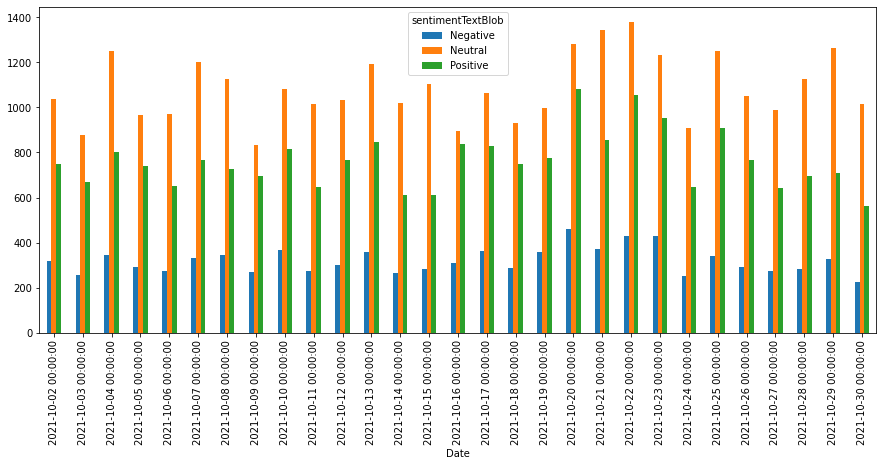

In [62]:
#The sentiments per day in the month of october 2021
a = df8.loc[(df8["Date"] > "2021-10-01") & (df8["Date"] < "2021-10-31"), ["Date","sentimentTextBlob"]]
b = pd.crosstab(a.Date,a.sentimentTextBlob)
b.plot.bar(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

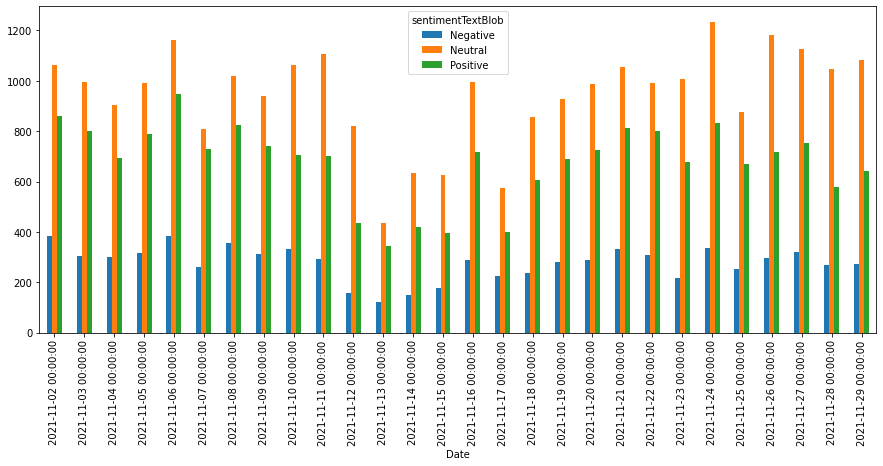

In [63]:
#The sentiments per day in the month of November 2021
a = df8.loc[(df8["Date"] > "2021-11-01") & (df8["Date"] < "2021-11-30"), ["Date","sentimentTextBlob"]]
b = pd.crosstab(a.Date,a.sentimentTextBlob)
b.plot.bar(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

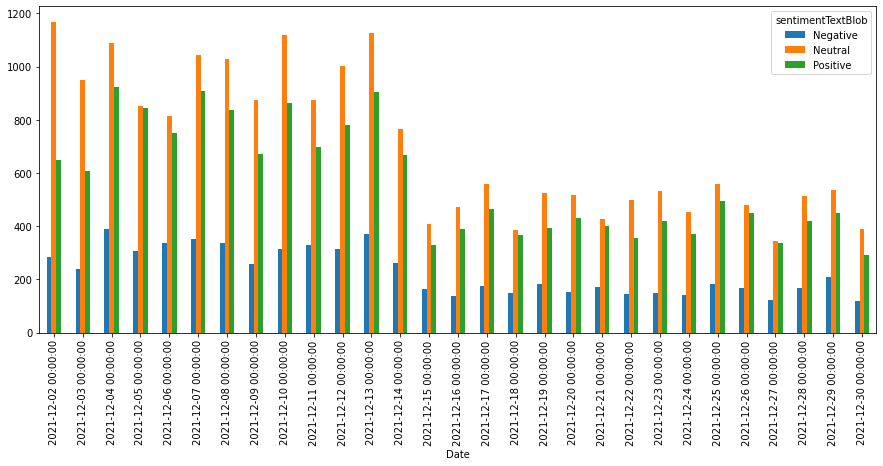

In [64]:
#The sentiments per day in the month of December 2021
a = df8.loc[(df8["Date"] > "2021-12-01") & (df8["Date"] < "2021-12-31"), ["Date","sentimentTextBlob"]]
b = pd.crosstab(a.Date,a.sentimentTextBlob)
b.plot.bar(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

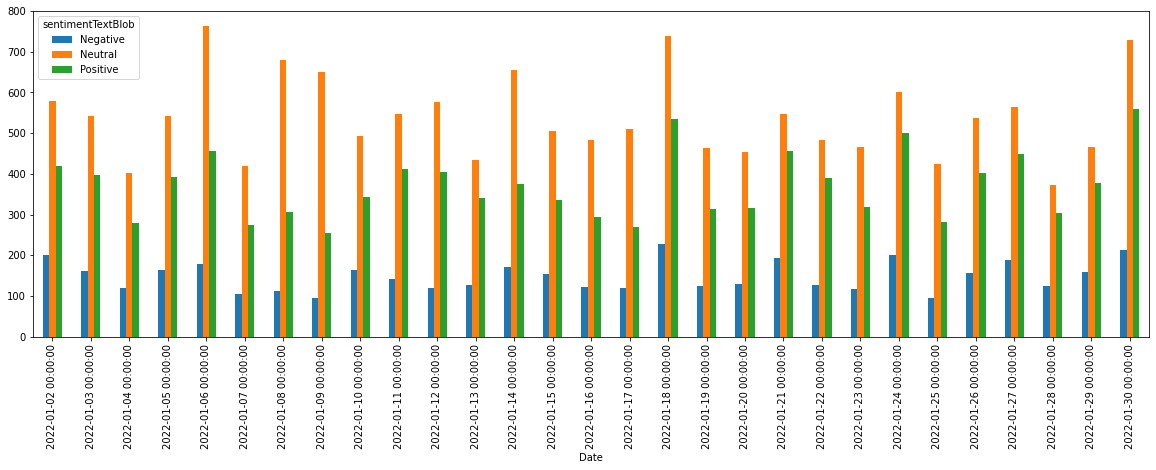

In [65]:
#The sentiments per day in the month of January 2022
a = df8.loc[(df8["Date"] > "2022-01-01") & (df8["Date"] < "2022-01-31"), ["Date","sentimentTextBlob"]]
b = pd.crosstab(a.Date,a.sentimentTextBlob)
b.plot.bar(figsize = (20,6))